Uisng merge dataset that was imputed the missing values with the mean and median for count columns

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
import pandas as pd

In [43]:
path="/content/drive/MyDrive/Capstone project HW/Model/Merged_Electricity_Summarized_Weather_data_Imputed.csv"

In [44]:
df = pd.read_csv(path)

In [45]:
df.shape

(2122, 64)

In [46]:
df.head()

,City,Date,Scope,EB Units in kWh,EB Units in wH,Total EB Cost in INR,Private Power Purchase Units in kWh,Total Private Power Purchased Cost in INR,Green RE Units in kWh,Inhouse Roof top Solar consumption in kWh,...,temperature_2m_min,wind_speed_10m_mean,cloud_cover_mean,shortwave_radiation_sum,precipitation_sum,dew_point_2m_mean,pressure_msl_mean,soil_moisture_0_to_10cm_mean,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean
0,Ahmedabad City,4/1/2016,Scope 3,16359.00,16359000.00,5926612.88,557806.01,1967639.70,0.00,47020.07,...,24.21,9.50,17.67,23.86,3.48,14.19,1007.65,0.14,7.01,37.81
1,Ahmedabad City,5/1/2016,Scope 3,15874.00,15874000.00,5926612.88,557806.01,1967639.70,0.00,47020.07,...,26.64,11.77,4.08,26.51,8.42,18.97,1004.84,0.15,7.92,42.94
2,Ahmedabad City,6/1/2016,Scope 3,17214.00,17214000.00,5926612.88,557806.01,1967639.70,0.00,47020.07,...,29.26,14.82,15.03,23.83,1.68,20.97,1000.60,0.16,7.25,43.00
3,Ahmedabad City,7/1/2016,Scope 3,12270.00,12270000.00,5926612.88,557806.01,1967639.70,0.00,47020.07,...,26.13,11.47,72.82,13.80,135.20,25.03,1001.52,0.24,3.76,82.04
4,Ahmedabad City,8/1/2016,Scope 3,12018.00,12018000.00,5926612.88,557806.01,1967639.70,0.00,47020.07,...,25.29,7.50,67.05,15.96,128.01,25.07,1005.58,0.29,4.21,84.78


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122 entries, 0 to 2121
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   City                                          2122 non-null   object 
 1   Date                                          2122 non-null   object 
 2   Scope                                         2122 non-null   object 
 3   EB Units in kWh                               2122 non-null   float64
 4   EB Units in wH                                2122 non-null   float64
 5   Total EB Cost in INR                          2122 non-null   float64
 6   Private Power Purchase Units in kWh           2122 non-null   float64
 7   Total Private Power Purchased Cost in INR     2122 non-null   float64
 8   Green RE Units in kWh                         2122 non-null   float64
 9   Inhouse Roof top Solar consumption in kWh     2122 non-null   f

In [48]:
# Convert 'Date' column to datetime format (if not already done)
df['Date'] = pd.to_datetime(df['Date'])

# Modify the 'Date' column to keep only Year and Month in 'YYYY-MM' format
df['Date'] = df['Date'].dt.to_period('M')

In [49]:
Column_to_use=['City','Date','Total Units (kWh)','No of Employees','No of Seats','Sft Served','lat','long','temperature_2m_mean',
               'temperature_2m_max','temperature_2m_min','wind_speed_10m_mean','cloud_cover_mean','shortwave_radiation_sum','precipitation_sum',
               'dew_point_2m_mean','pressure_msl_mean','soil_moisture_0_to_10cm_mean','et0_fao_evapotranspiration_sum','relative_humidity_2m_mean']

data = df[Column_to_use]

In [50]:
data.shape

(2122, 20)

In [51]:
data.head()

,City,Date,Total Units (kWh),No of Employees,No of Seats,Sft Served,lat,long,temperature_2m_mean,temperature_2m_max,temperature_2m_min,wind_speed_10m_mean,cloud_cover_mean,shortwave_radiation_sum,precipitation_sum,dew_point_2m_mean,pressure_msl_mean,soil_moisture_0_to_10cm_mean,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean
0,Ahmedabad City,2016-04,16359.00,5589,12937,1631676,23.02,72.57,31.15,38.09,24.21,9.50,17.67,23.86,3.48,14.19,1007.65,0.14,7.01,37.81
1,Ahmedabad City,2016-05,15874.00,5589,12937,1631676,23.02,72.57,33.79,41.04,26.64,11.77,4.08,26.51,8.42,18.97,1004.84,0.15,7.92,42.94
2,Ahmedabad City,2016-06,17214.00,5589,12937,1631676,23.02,72.57,35.70,43.25,29.26,14.82,15.03,23.83,1.68,20.97,1000.60,0.16,7.25,43.00
3,Ahmedabad City,2016-07,12270.00,5589,12937,1631676,23.02,72.57,28.43,31.28,26.13,11.47,72.82,13.80,135.20,25.03,1001.52,0.24,3.76,82.04
4,Ahmedabad City,2016-08,12018.00,5589,12937,1631676,23.02,72.57,27.74,30.55,25.29,7.50,67.05,15.96,128.01,25.07,1005.58,0.29,4.21,84.78


In [52]:
# Now, describe the dataset
pd.set_option('display.float_format', '{:.2f}'.format)
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Total Units (kWh),2122.00,1036255.67,2060313.31,0.00,17290.50,237259.87,821951.25,14281372.00
No of Employees,2122.00,3809.36,5283.75,0.00,701.00,1863.00,3726.00,44474.00
No of Seats,2122.00,8817.66,13216.86,0.00,2020.00,4312.00,8625.00,343891.00
Sft Served,2122.00,1112133.44,1532457.42,0.00,201654.00,543892.00,1087784.00,9319474.00
lat,2122.00,18.02,6.04,8.52,12.97,17.69,22.57,29.75
long,2122.00,78.31,4.22,72.57,76.27,77.39,80.27,91.71
temperature_2m_mean,2122.00,26.33,4.06,10.57,24.02,26.52,28.70,39.89
temperature_2m_max,2122.00,31.06,4.48,15.96,28.22,30.45,33.32,46.98
temperature_2m_min,2122.00,22.20,4.55,5.29,19.75,22.99,25.65,32.60
wind_speed_10m_mean,2122.00,9.80,3.37,3.66,7.33,9.15,11.51,22.10


High Variability: Variables like Total Units (kWh), Sft Served, No of Seats, and No of Employees show high standard deviations and large ranges between the minimum and maximum values. This suggests that the dataset contains entities with very different sizes and consumption patterns.

Environmental Data: Environmental variables (temperature, humidity, precipitation, wind speed) also show significant variation

Distribution Skew: Many variables (e.g., Total Units (kWh), No of Employees, Sft Served) are skewed, as indicated by the large differences between the mean and median (50%).

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122 entries, 0 to 2121
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype    
---  ------                          --------------  -----    
 0   City                            2122 non-null   object   
 1   Date                            2122 non-null   period[M]
 2   Total Units (kWh)               2122 non-null   float64  
 3   No of Employees                 2122 non-null   int64    
 4   No of Seats                     2122 non-null   int64    
 5   Sft Served                      2122 non-null   int64    
 6   lat                             2122 non-null   float64  
 7   long                            2122 non-null   float64  
 8   temperature_2m_mean             2122 non-null   float64  
 9   temperature_2m_max              2122 non-null   float64  
 10  temperature_2m_min              2122 non-null   float64  
 11  wind_speed_10m_mean             2122 non-null   float64  
 12  cloud_

#Plot the histograms of the columns to get a feel for the distribution of data.

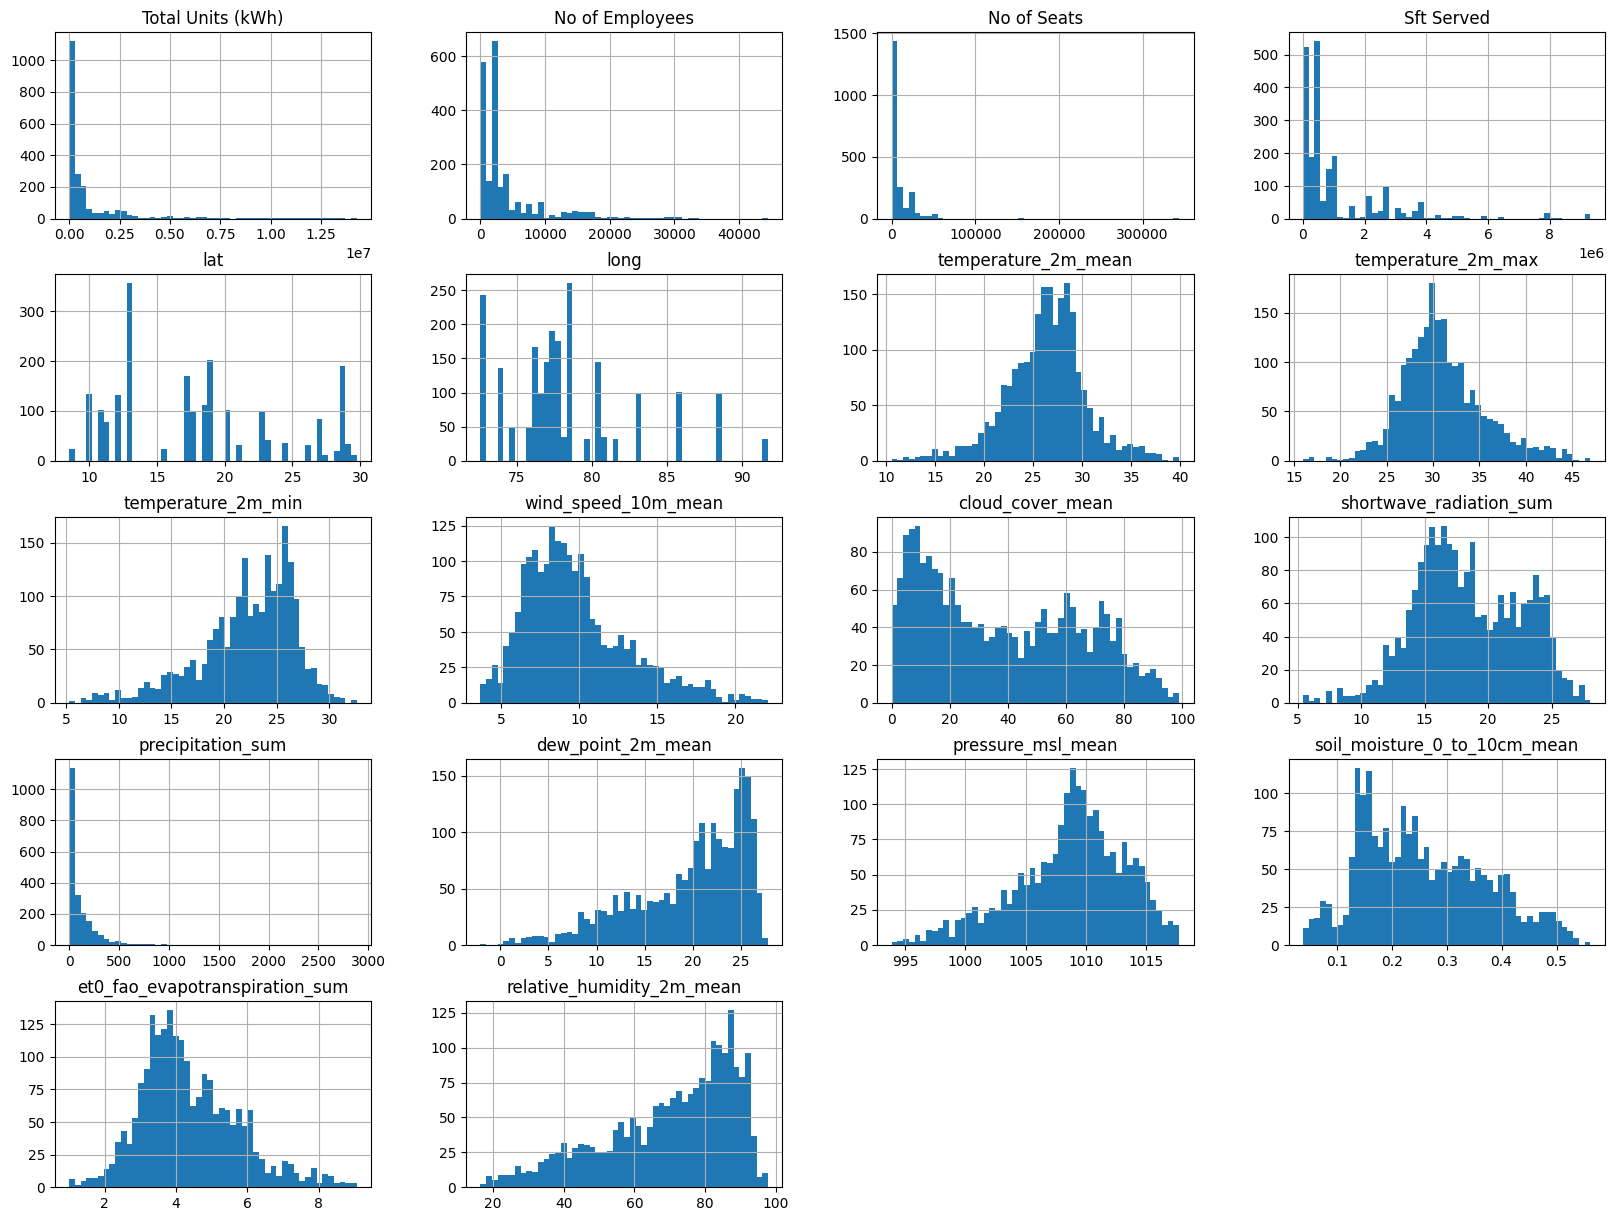

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins = 50, figsize = (20, 15))
plt.show()

In [55]:
# Top 10 cites by the Total Units (kWh)
top_10_cities = data.groupby('City')['Total Units (kWh)'].sum().sort_values(ascending=False).reset_index()

pd.set_option('display.float_format', '{:,.0f}'.format)

top_10_cities.head(10)



,City,Total Units (kWh)
0,Bangalore City,"837,707,716"
1,Chennai City,"405,696,132"
2,Hyderabad City,"246,447,090"
3,Pune,"229,398,372"
4,Noida City,"107,331,113"
5,Kolkata City,"104,177,829"
6,Mumbai City,"82,811,514"
7,Cochin (Kochi) City,"60,677,277"
8,Mysore City,"37,504,587"
9,Coimbatore City,"22,036,249"


In [56]:
# Check the correlations
pd.set_option('display.float_format', '{:.2f}'.format)
correlations = data.select_dtypes(include=['float64', 'int64']).corr()
correlations


,Total Units (kWh),No of Employees,No of Seats,Sft Served,lat,long,temperature_2m_mean,temperature_2m_max,temperature_2m_min,wind_speed_10m_mean,cloud_cover_mean,shortwave_radiation_sum,precipitation_sum,dew_point_2m_mean,pressure_msl_mean,soil_moisture_0_to_10cm_mean,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean
Total Units (kWh),1.00,0.76,0.64,0.75,-0.19,-0.02,-0.09,-0.06,-0.08,0.12,0.08,0.04,-0.03,-0.04,0.08,0.08,0.02,-0.01
No of Employees,0.76,1.00,0.65,0.72,-0.20,-0.01,-0.07,-0.05,-0.05,0.13,0.06,0.04,-0.04,-0.01,0.10,0.01,0.02,0.01
No of Seats,0.64,0.65,1.00,0.78,-0.16,-0.06,-0.08,-0.04,-0.08,0.10,0.03,0.05,-0.04,-0.06,0.10,0.03,0.03,-0.04
Sft Served,0.75,0.72,0.78,1.00,-0.20,-0.07,-0.12,-0.07,-0.12,0.11,0.06,0.04,-0.03,-0.08,0.12,0.09,0.00,-0.03
lat,-0.19,-0.20,-0.16,-0.20,1.00,0.15,-0.04,0.06,-0.19,-0.09,-0.33,-0.05,-0.07,-0.34,-0.23,-0.19,0.09,-0.27
long,-0.02,-0.01,-0.06,-0.07,0.15,1.00,0.04,0.01,0.06,0.06,-0.03,-0.10,0.04,0.14,-0.13,-0.02,-0.08,0.13
temperature_2m_mean,-0.09,-0.07,-0.08,-0.12,-0.04,0.04,1.00,0.91,0.91,0.24,-0.01,0.50,0.04,0.42,-0.74,-0.15,0.66,-0.21
temperature_2m_max,-0.06,-0.05,-0.04,-0.07,0.06,0.01,0.91,1.00,0.66,0.16,-0.32,0.72,-0.21,0.06,-0.55,-0.37,0.85,-0.56
temperature_2m_min,-0.08,-0.05,-0.08,-0.12,-0.19,0.06,0.91,0.66,1.00,0.29,0.33,0.19,0.27,0.72,-0.78,0.11,0.34,0.19
wind_speed_10m_mean,0.12,0.13,0.10,0.11,-0.09,0.06,0.24,0.16,0.29,1.00,0.18,0.07,0.08,0.12,-0.38,-0.23,0.14,-0.05


In [57]:
#Since we wish to predict Total Units (kWh), let us look at how it is
#correlated with other variables sorted from highest to lowest
pd.set_option('display.float_format', '{:.2f}'.format)
correlations['Total Units (kWh)'].sort_values(ascending=False)

,Total Units (kWh)
Total Units (kWh),1.00
No of Employees,0.76
Sft Served,0.75
No of Seats,0.64
wind_speed_10m_mean,0.12
soil_moisture_0_to_10cm_mean,0.08
pressure_msl_mean,0.08
cloud_cover_mean,0.08
shortwave_radiation_sum,0.04
et0_fao_evapotranspiration_sum,0.02


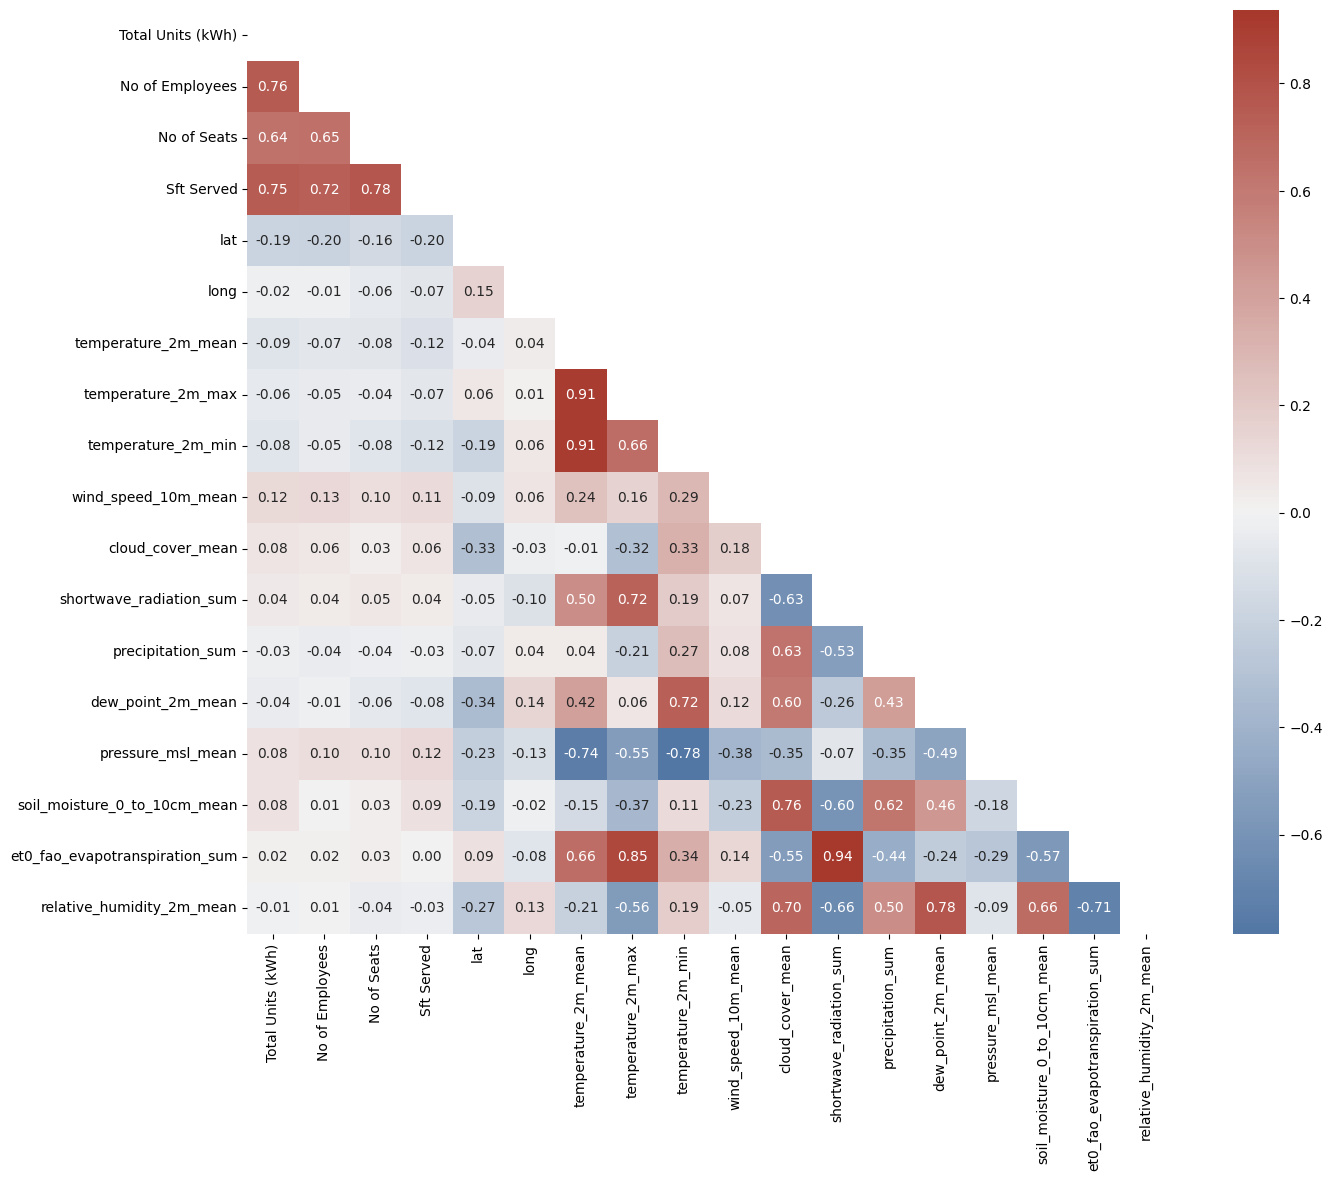

In [58]:
#look at a scatter plot to get a sense of how each variable is correlated with the rest.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate pairwise correlations for numeric columns
matrix = numeric_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(matrix, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)

# Show the plot
plt.show()


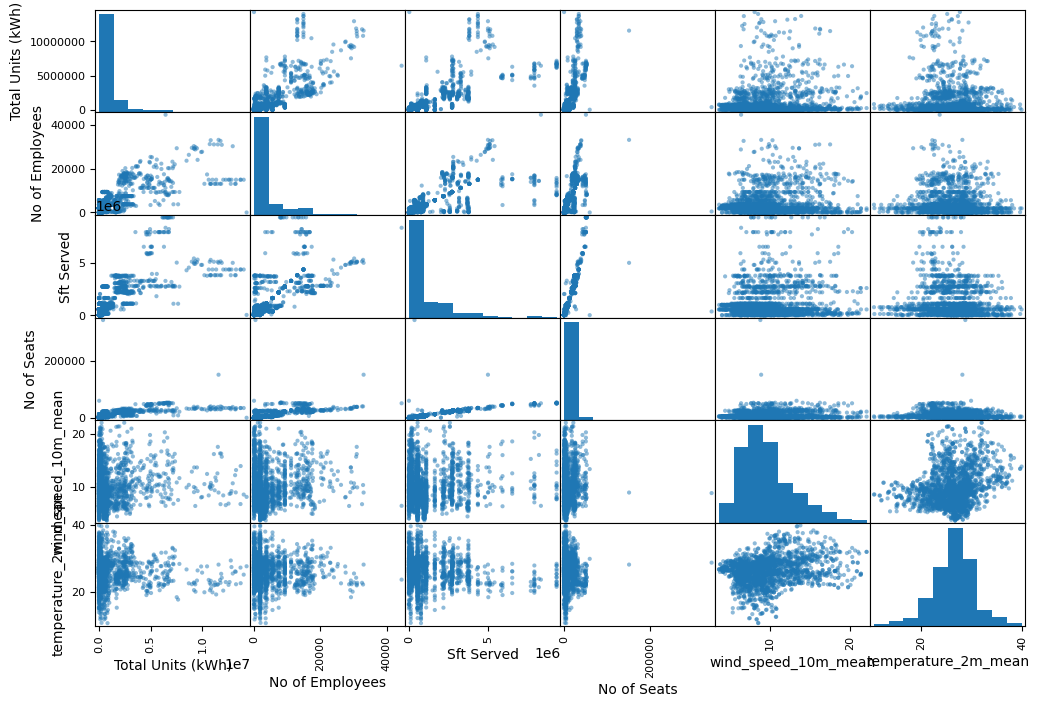

In [59]:
from pandas.plotting import scatter_matrix

attributes = ['Total Units (kWh)','No of Employees','Sft Served',
             'No of Seats','wind_speed_10m_mean','temperature_2m_mean']
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

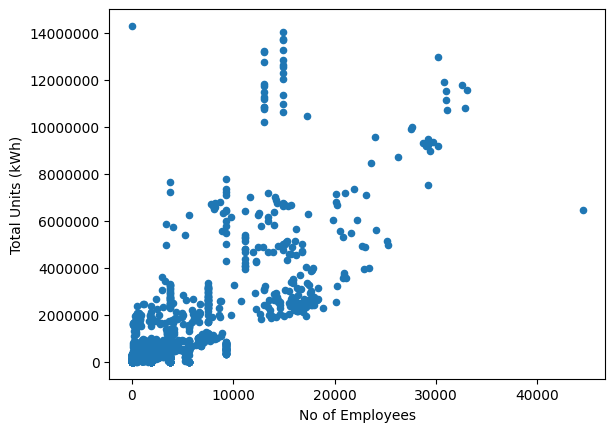

In [60]:
#Let us zoom into Total Units (kWh) vs No of Employees
data.plot(kind='scatter', x="No of Employees", y="Total Units (kWh)")
plt.ticklabel_format(style='plain', axis='y')
plt.show()


As the number of employees increases, the total electricity consumption also tends to increase as larger organizations or facilities with more employees typically require more energy for operations.

A significant number of points are clustered in the lower-left portion of the plot, where the number of employees is below 10,000 and the electricity consumption is less than 4,000,000 kWh. This suggests that many of the locations in the dataset have fewer employees and lower energy consumption

There are a few outliers where locations with fewer employees (around 0 to 10,000) consume relatively high amounts of electricity (e.g., over 1,200,000 kWh). These points indicate that certain sites, despite having fewer employees, have high energy needs—perhaps due to equipment or specific facility needs that require a lot of electricity.
Similarly, there are outliers with a large number of employees (up to 40,000) but a more moderate amount of electricity consumption.


#Dealing with sknewwness data


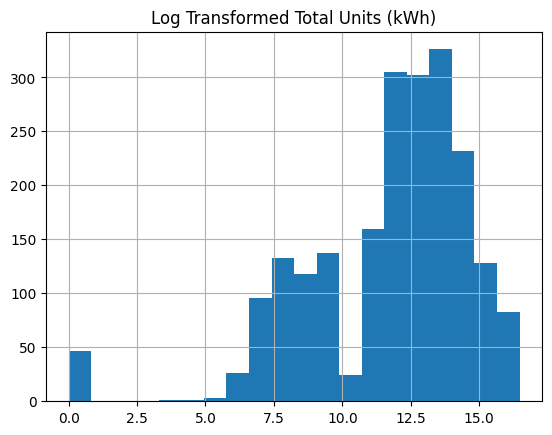

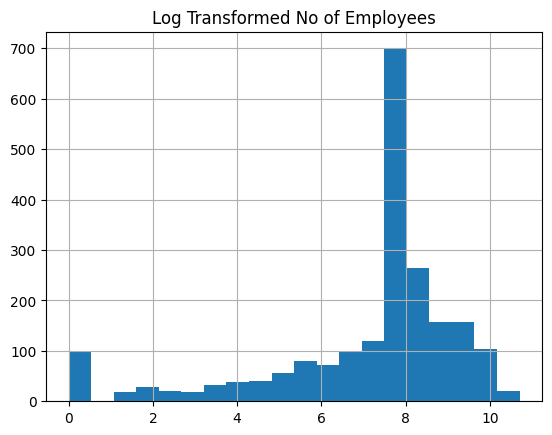

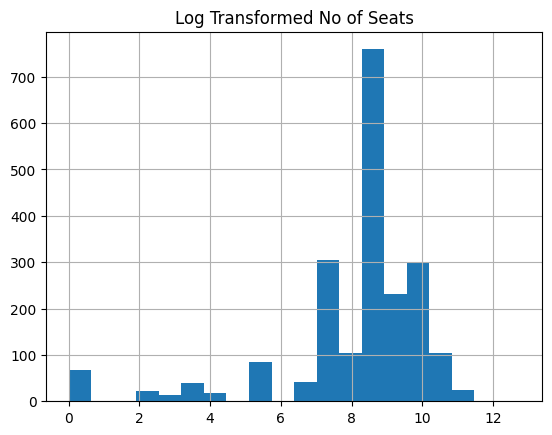

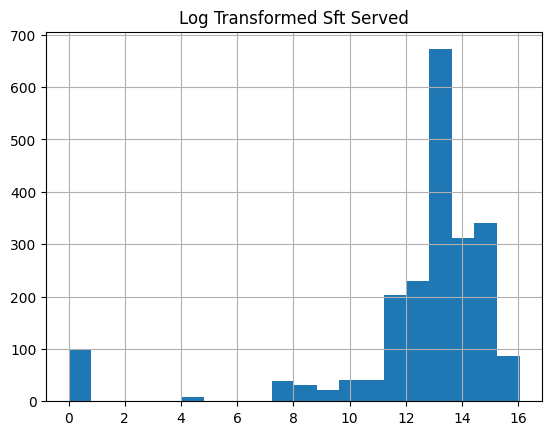

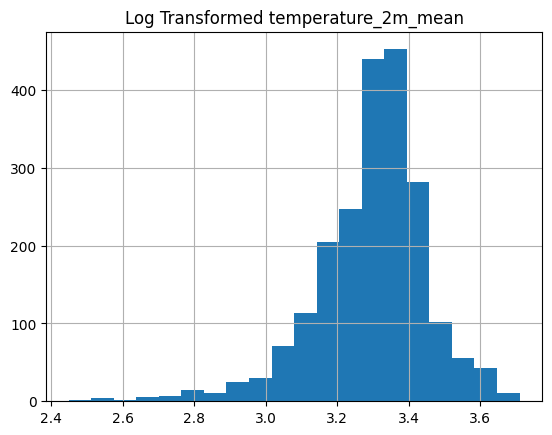

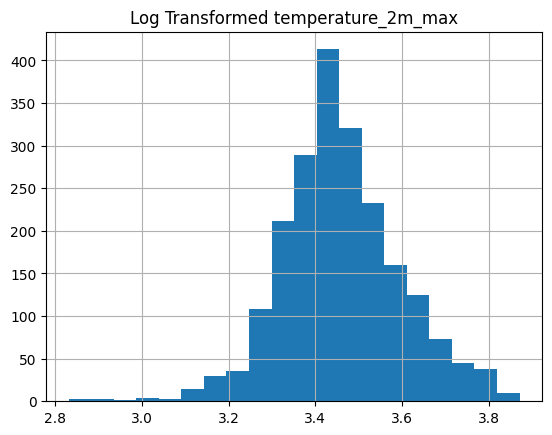

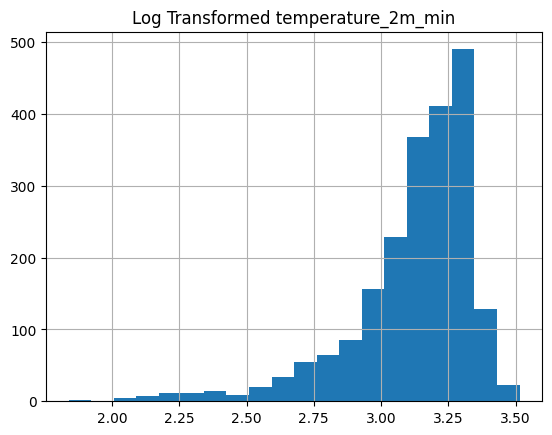

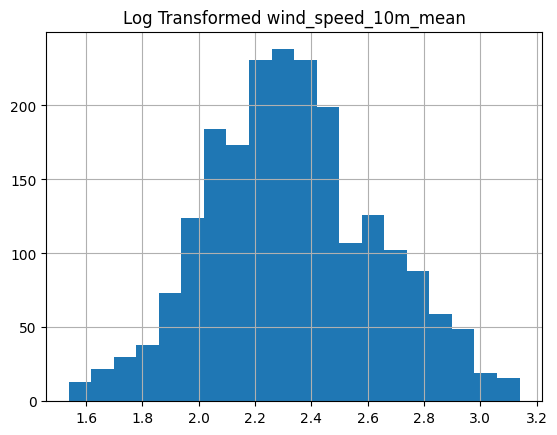

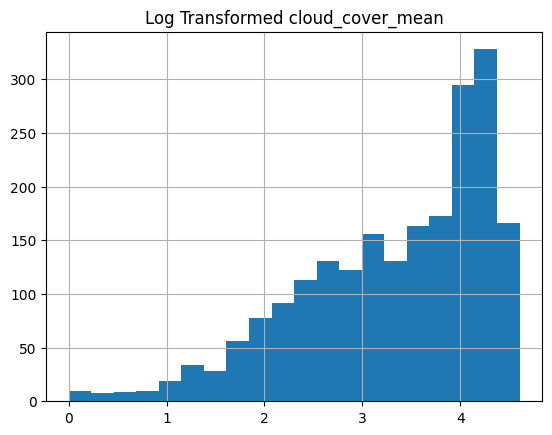

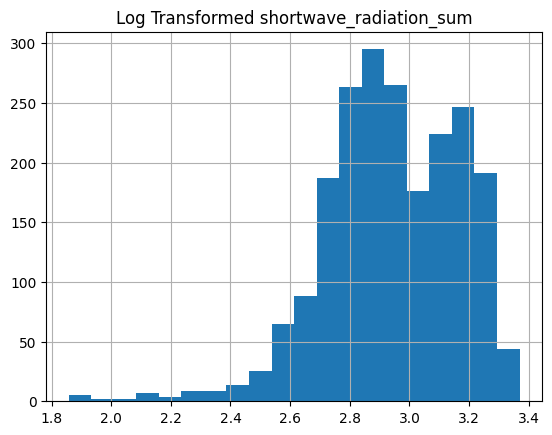

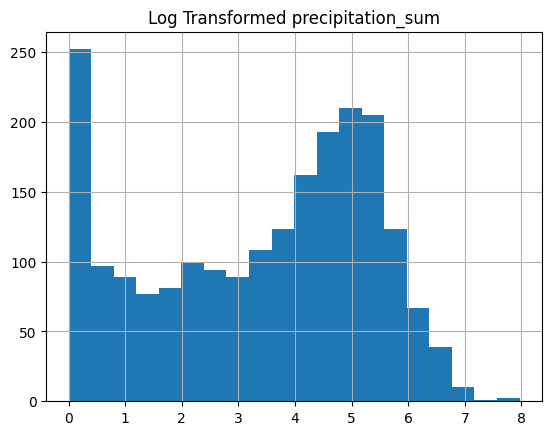

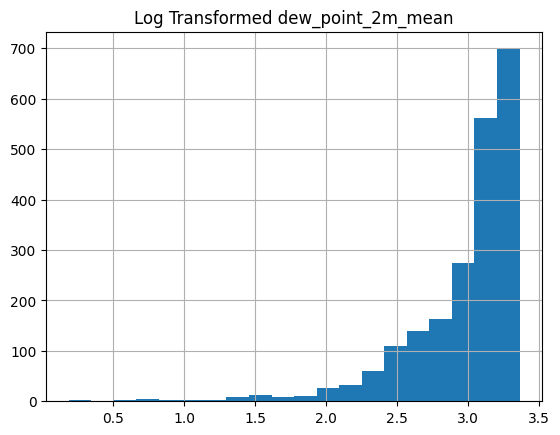

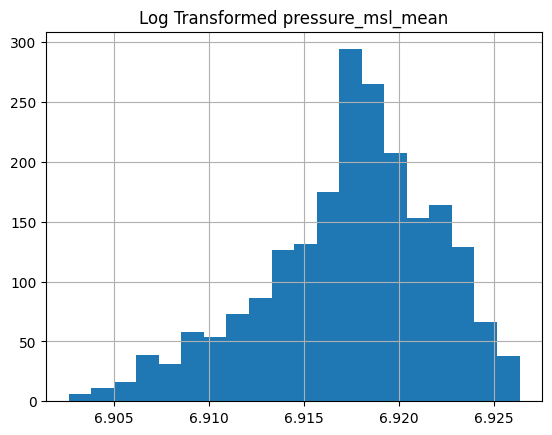

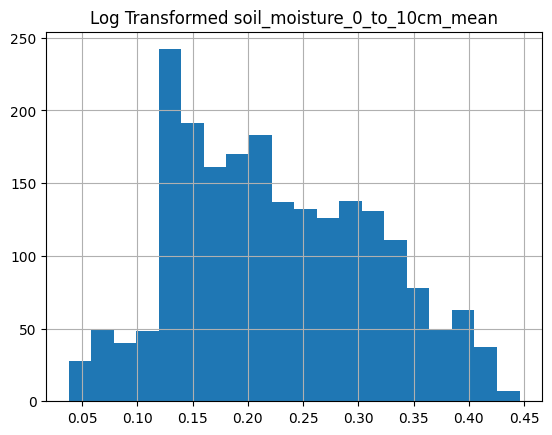

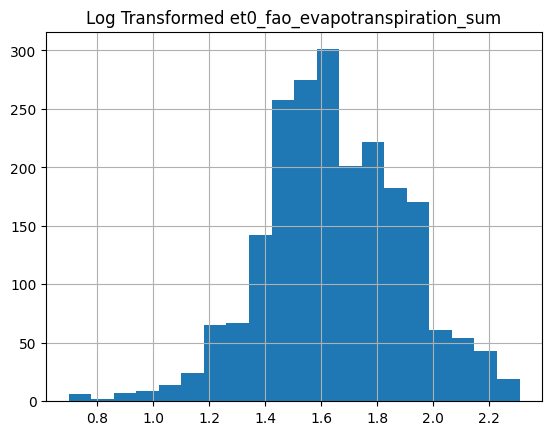

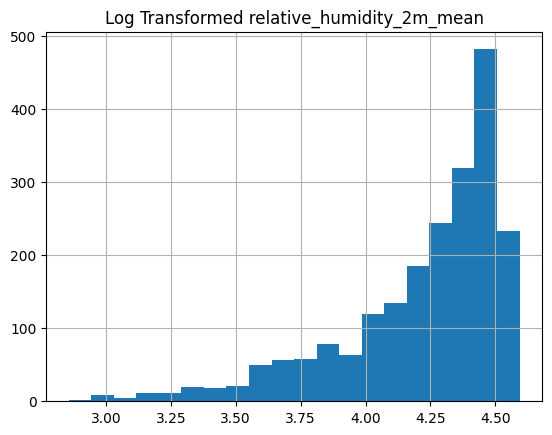

In [61]:
from scipy.stats import boxcox
import numpy as np


# List of columns to apply the Box-Cox transformation
columns_to_transform = ['Total Units (kWh)','No of Employees','No of Seats','Sft Served','temperature_2m_mean',
                        'temperature_2m_max','temperature_2m_min','wind_speed_10m_mean','cloud_cover_mean','shortwave_radiation_sum','precipitation_sum',
                        'dew_point_2m_mean','pressure_msl_mean','soil_moisture_0_to_10cm_mean','et0_fao_evapotranspiration_sum','relative_humidity_2m_mean']



# Apply log(1+x) transformation to each column
for col in columns_to_transform:
    transformed_data = np.log1p(data[col])  # log1p is log(1 + x) transformation
    pd.DataFrame(transformed_data, columns=[col]).hist(bins=20)
    plt.title(f"Log Transformed {col}")
    plt.show()


In [62]:
!pip install summarytools
from summarytools import dfSummary

In [63]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,City[object],1. Mumbai City2. Hyderabad City3. Bangalore City4. Chennai City5. Cochin (Kochi) City6. Noida City7. Pune8. Bhubaneshwar City9. Coimbatore City10. Mysore City11. other,202 (9.5%)171 (8.1%)163 (7.7%)145 (6.8%)133 (6.3%)118 (5.6%)112 (5.3%)101 (4.8%)101 (4.8%)100 (4.7%)776 (36.6%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAECUlEQVR4nO3cTWobWQBG0VIjQmciYQxejBfRi+1FaDfGWINOyEQZZGypfh43auWceYECl2eqeF92l8tlgsJfv/sH8OcQGxmxkREbGbGRERsZsZERGxmxkdlN0/R1mqYvK5//cblcvg38PTyw/fPz8z+Hw+FpzcPn8/l9t9v9Kzjm2B8Oh6fX19dvx+Px+5IHPz4+/j6dTk9vb29fpmkSGzftp2majsfj95eXl/9WPP918O/hgXlBICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2Mvtp+nU3bemDa57hz7Y/n8/vp9PpaVpxN+18Pr9P0/Rj/M/iEdkgkNn5L7OorDnZnGassnhdZVHFWovWVRZVbLFmXWVRxSo+6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZFZNHgxcmGLxYMXIxfWci2cjMELGScbGYMXMgYvZAxeyPioS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxnXwskYvJDxgkBm6Z9Rf0JZbdG6yrKKLWavqyyr2GrpusqyitW8IJARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGZva6yrGKrResqyyq2cC2cjHUVmSUnm1ONTWYPXoxd2GrW4MXYhRGWDF6MXdjER10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyswYvxi6MMHvwYuzCVq6FkzF4ITP3ZHOqsdmswYuxCyPcHLwYuzDK3MGLsQub+ahLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkbq6rLKsYZda6yrKKEWwQyFhXkZlzsjnVGOLmusqyilGurqssqxhpzrrKsoohfNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc3XwYuzCSDcHL8YujOJaOBmDFzK3TjanGsNcHbwYuzDSp4MXYxdGuzV4MXZhGB91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyHw6eDF2YbSrgxdjF0ZyLZyMwQsZLwhk/BklY11FxrqKjHUVGS8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkXEtnIx1FRknGxmDFzIGL2QMXsj4qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZ18LJGLyQuXWyPQon9B24Onh5FIY79+HTwcujMNy5H7cGL4/CcOcO+KhLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5tPBy6N45H/b/83VwcujMNy5D66FkzF4IeMFgYzYyIiNjNjIiI2M2MiIjYzYyIiNzE+w8k7iwa/3vgAAAABJRU5ErkJggg=="">",0(0.0%)
2,Date[period[M]],not supported dtype period[M],nan,nan,0(0.0%)
3,Total Units (kWh)[float64],Mean (sd) : 1036255.7 (2060313.3)min < med < max:0.0 < 237259.9 < 14281372.0IQR (CV) : 804660.8 (0.5),"2,002 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACYElEQVR4nO3YvXLaUBCG4V0w5GAYiZ8Yd25S0KVw6T5tLtate1qugCItg7ClQQbDEKVLk0lsSWjsb/I+NbtS8QqNjhdFYcBH13rvGwDe4uK1H7h7z8y6FfcfiqLYVZwFfvtnqO7em0wm36MoGlVZnmXZo7vfEyvqeu0ftRtF0eju7m4Xx/G+zOI0TcN8Ph8lSdI1M0JFLa+++s3M4jjeT6fT5wr7exVmgD/wMQUJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJF00uP51OHTOL3L3qikNRFLsz3hJENRZqnued4/H49ebmpt1ut/dVdmRZ9uju98SKxkI9HA4XIYTL29vb/fX19WPZ+TRNw3w+HyVJ0jUzQv3PNfrqNzPr9/v76XT6XHG8d9abgSw+piCBUCGh8Vd/HTVPDVpm9rPG5evMc1pxZh821DqnBqfTqZPn+ZfBYLBstVrHsteuO/+epxXu3jOzbsXxug93Yw/om0JN0zSUXbzdboOZWZ7nYbVaXZad32w2gxDC5Ww28+Fw+FJmdr1eh+VyeTWbzX4Mh8Nt2WvXmd/tdp8Wi8VVkiSf3T0re+2awng8/hbH8aDsYN2H08zs6elp6+4PZlblOPKlKIq/zv0CcJS1X4oC1SEAAAAASUVORK5CYII="">",0(0.0%)
4,No of Employees[int64],Mean (sd) : 3809.4 (5283.7)min < med < max:0.0 < 1863.0 < 44474.0IQR (CV) : 3025.0 (0.7),740 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACXElEQVR4nO3YvY7aQBSG4TOBRQMktjDIdNxApBRINPRJmYvdNj1Fau6ABiEhYwsWgoWcKlGk/Ox6DFk+6X1q5oyLV+PBrqoqA+7dm9d+AOAl2s/9wDnXNbNO4PxzVVXHwLXAT/8M1TnXHQ6Hn6MoGoQML4oic849Eiuaeu5E7URRNJjP58c4jk91Bud57heLxWC73XbMjFDRyLOvfjOzOI5PaZo+BczvBqwBfsOfKUggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggV

In [64]:
#applying a log transformation doesn't sufficiently improve the distribution of some variables, so I just apply log transform to below features:

log_transform_columns = [
    'Total Units (kWh)', 'No of Employees', 'No of Seats', 'Sft Served',
]

def apply_log_transform_and_create_new_columns(df, columns):
    for col in columns:

        new_col_name = col + '_log'

        df.loc[:, new_col_name] = np.log1p(df.loc[:, col])

apply_log_transform_and_create_new_columns(data, log_transform_columns)

data.head()

,City,Date,Total Units (kWh),No of Employees,No of Seats,Sft Served,lat,long,temperature_2m_mean,temperature_2m_max,...,precipitation_sum,dew_point_2m_mean,pressure_msl_mean,soil_moisture_0_to_10cm_mean,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean,Total Units (kWh)_log,No of Employees_log,No of Seats_log,Sft Served_log
0,Ahmedabad City,2016-04,16359.00,5589,12937,1631676,23.02,72.57,31.15,38.09,...,3.48,14.19,1007.65,0.14,7.01,37.81,9.70,8.63,9.47,14.31
1,Ahmedabad City,2016-05,15874.00,5589,12937,1631676,23.02,72.57,33.79,41.04,...,8.42,18.97,1004.84,0.15,7.92,42.94,9.67,8.63,9.47,14.31
2,Ahmedabad City,2016-06,17214.00,5589,12937,1631676,23.02,72.57,35.70,43.25,...,1.68,20.97,1000.60,0.16,7.25,43.00,9.75,8.63,9.47,14.31
3,Ahmedabad City,2016-07,12270.00,5589,12937,1631676,23.02,72.57,28.43,31.28,...,135.20,25.03,1001.52,0.24,3.76,82.04,9.41,8.63,9.47,14.31
4,Ahmedabad City,2016-08,12018.00,5589,12937,1631676,23.02,72.57,27.74,30.55,...,128.01,25.07,1005.58,0.29,4.21,84.78,9.39,8.63,9.47,14.31


#Train some models


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error


# Get X and y
X = data.drop(['Date','City','Total Units (kWh)', 'Total Units (kWh)_log','No of Employees', 'No of Seats', 'Sft Served', 'lat', 'long'], axis=1)
y = data['Total Units (kWh)_log']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,
                                                    train_size=0.8, random_state=100)

# Use StandardScaler to scale X_train and X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
}

# Function to evaluate models using both RMSE and MSE
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    return mse_train, mse_test, rmse_train, rmse_test

# Loop through models and print MSE and RMSE results
for model_name, model in models.items():
    mse_train, mse_test, rmse_train, rmse_test = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

    print(f"{model_name}:")
    print(f"Train MSE: {mse_train:.2f}, Test MSE: {mse_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f}, Test RMSE: {rmse_test:.2f}")
    print("\n")


Random Forest:
Train MSE: 0.53, Test MSE: 3.28
Train RMSE: 0.73, Test RMSE: 1.81


XGBoost:
Train MSE: 0.17, Test MSE: 3.44
Train RMSE: 0.41, Test RMSE: 1.86


KNN:
Train MSE: 3.81, Test MSE: 5.26
Train RMSE: 1.95, Test RMSE: 2.29


Neural Network:
Train MSE: 0.98, Test MSE: 4.25
Train RMSE: 0.99, Test RMSE: 2.06




#Random Forest has lowest RMSE among 4 models

#Display Predicted vs Actual Values for Random Forest

In [67]:
# Train the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Get predictions on the test data (log scale)
y_test_pred_log = random_forest.predict(X_test_scaled)

# Reverse the log transformation to bring predictions and actual values back to original scale
y_test_pred_original = np.expm1(y_test_pred_log)  # Predicted values back to original scale
y_test_original = np.expm1(y_test)  # Actual values back to original scale

# Create a DataFrame to compare actual and predicted values in original scale
actual_vs_predicted = pd.DataFrame({
    'Actual': y_test_original,
    'Predicted': y_test_pred_original
})

# Display some actual vs predicted values
print("Actual vs Predicted values for Random Forest:")
print(actual_vs_predicted.head(20))


Actual vs Predicted values for Random Forest:
         Actual  Predicted
728   198157.68  406306.32
29       568.00     870.14
367     3462.00    3741.52
1535  386338.00  385084.30
1184  909592.26  920321.13
1729  711899.00  235825.66
825   124363.00  155114.44
1780  559497.00  308129.43
238     2604.00    4463.75
1356    9464.00    9012.51
731   190000.82  149225.51
1272    1150.00    1273.54
1142  976481.00  756023.72
630   438935.00  464600.74
275   191410.00  123486.22
1711 1199910.80  719334.53
463  2646317.90 2550825.96
27       442.00    1022.37
1854   11940.00   12444.78
1138 1025637.00  854721.93


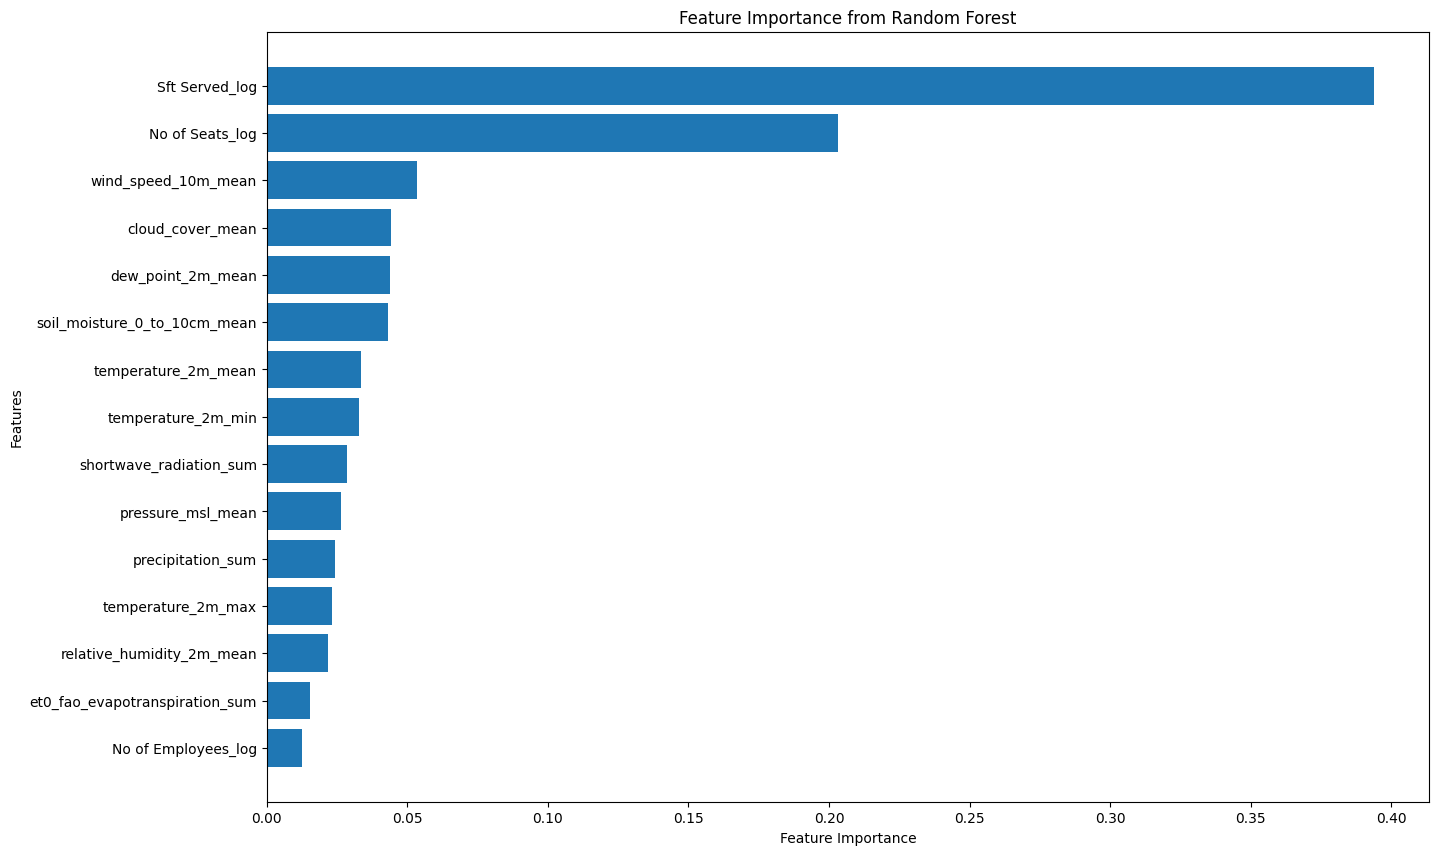

In [68]:
importances = random_forest.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


# Plot the feature importances
plt.figure(figsize=(15, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()


#Test with future data

In [73]:
path2='/content/drive/MyDrive/Capstone project HW/Model/Future Data.xlsx'
future_data = pd.read_excel(path2)

Column_to_use2=['City','Date','Total Units (kWh)','No of Employees','No of Seats','Sft Served','lat','long','temperature_2m_mean',
               'temperature_2m_max','temperature_2m_min','wind_speed_10m_mean','cloud_cover_mean','shortwave_radiation_sum','precipitation_sum',
               'dew_point_2m_mean','pressure_msl_mean','soil_moisture_0_to_10cm_mean','et0_fao_evapotranspiration_sum','relative_humidity_2m_mean']

future_data = future_data [Column_to_use2]
future_data.head()


,City,Date,Total Units (kWh),No of Employees,No of Seats,Sft Served,lat,long,temperature_2m_mean,temperature_2m_max,temperature_2m_min,wind_speed_10m_mean,cloud_cover_mean,shortwave_radiation_sum,precipitation_sum,dew_point_2m_mean,pressure_msl_mean,soil_moisture_0_to_10cm_mean,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean
0,Bangalore City,2025-01-01,6310499.75,12507,51172,9319474,12.97,77.59,21.37,29.55,14.24,9.91,23.25,21.46,0.00,9.40,1013.68,0.23,4.83,46.91
1,Bangalore City,2025-02-01,6146284.84,13375,51172,9319474,12.97,77.59,23.92,32.14,16.42,10.38,15.04,23.75,0.76,10.44,1013.78,0.23,5.61,42.93
2,Bangalore City,2025-03-01,6888586.00,14229,51172,9319474,12.97,77.59,26.93,34.06,20.00,9.09,10.83,23.84,16.59,12.76,1010.52,0.24,6.04,43.87
3,Bangalore City,2025-04-01,6997716.61,11673,51672,9319474,12.97,77.59,27.75,34.53,21.06,8.85,19.92,24.71,45.37,15.33,1010.75,0.28,6.17,48.65
4,Bangalore City,2025-05-01,7163660.65,13439,51172,9319474,12.97,77.59,26.44,33.11,21.56,12.38,43.76,22.72,105.91,20.42,1006.91,0.33,5.24,68.47


In [75]:
future_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   City                            143 non-null    object        
 1   Date                            143 non-null    datetime64[ns]
 2   Total Units (kWh)               143 non-null    float64       
 3   No of Employees                 143 non-null    int64         
 4   No of Seats                     143 non-null    int64         
 5   Sft Served                      143 non-null    int64         
 6   lat                             143 non-null    float64       
 7   long                            143 non-null    float64       
 8   temperature_2m_mean             143 non-null    float64       
 9   temperature_2m_max              143 non-null    float64       
 10  temperature_2m_min              143 non-null    float64       
 11  wind_s

In [78]:
#Apply log transofrm
future_data.loc[:, 'Total Units (kWh)_log'] = np.log1p(future_data['Total Units (kWh)'])  # Log transform target variable

log_transform_columns = ['No of Employees', 'No of Seats', 'Sft Served']
for col in log_transform_columns:
    # Apply np.log1p to handle zero values
    future_data.loc[:, f'{col}_log'] = np.log1p(future_data[col])

# Drop unnecessary columns
X_future = future_data.drop(['City', 'Date', 'lat', 'long', 'Total Units (kWh)', 'Total Units (kWh)_log',
                             'No of Employees', 'No of Seats', 'Sft Served'], axis=1)

# Apply StandardScaler that was used for training
X_future_scaled = scaler.transform(X_future)

# Use the trained Random Forest model to make predictions on the log-transformed future data
future_predictions_log = random_forest.predict(X_future_scaled)

# Reverse the log transformation on the predicted values
future_predictions = np.expm1(future_predictions_log)  # Reverse log1p transformation (exp(x) - 1)

# Create a DataFrame to show both actual and predicted values, including 'City'
comparison_df = pd.DataFrame({
    'City': future_data['City'],
    'Future Date': future_data['Date'],
    'Actual Total Units (kWh)': future_data['Total Units (kWh)'],  # Actual values in future_data
    'Predicted Total Units (kWh)': future_predictions  # Predicted values, reversed from log scale
})

# Group by 'City' and sort by 'Future Date'
comparison_df = comparison_df.sort_values(by=['City', 'Future Date'])


print("Actual vs Predicted values for Future Data by City:")
comparison_df.head(20)



Actual vs Predicted values for Future Data by City:


,City,Future Date,Actual Total Units (kWh),Predicted Total Units (kWh)
0,Bangalore City,2025-01-01,6310499.75,6006161.40
1,Bangalore City,2025-02-01,6146284.84,6066606.68
2,Bangalore City,2025-03-01,6888586.00,6455256.94
3,Bangalore City,2025-04-01,6997716.61,6735163.38
4,Bangalore City,2025-05-01,7163660.65,6762117.96
5,Bangalore City,2025-06-01,6617871.57,6724008.34
6,Bangalore City,2025-07-01,6771045.00,5762937.93
7,Bangalore City,2025-08-01,6664832.43,5965134.16
8,Bhubaneshwar City,2025-01-01,107370.00,104135.18
9,Bhubaneshwar City,2025-02-01,104942.00,144765.65
